In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-28 19:05'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-28 19:05,Live updates: Coronavirus pummels financial ma...
1,2020-02-28 19:05,Appeals court blocks Trump administration from...
2,2020-02-28 19:05,Bloomberg says he will run 'right to the bitte...
3,2020-02-28 19:05,Media's coronavirus stories trying to hurt Tru...
4,2020-02-28 19:05,South Carolina Primary Voters Will Use Brand N...
5,2020-02-28 19:05,Pope Francis cancels Mass over 'slight' illnes...
6,2020-02-28 19:05,Sen. Tim Kaine endorses Joe Biden before key p...
7,2020-02-28 19:05,"Main Street leans toward Sanders, but Wall Str..."
8,2020-02-28 19:05,US coronavirus staff were untrained and unprot...
9,2020-02-28 19:05,Broad anti-tobacco bill narrowly passes House ...


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
8,US coronavirus staff were untrained and unprot...
13,Growth of new coronavirus fuels questions over...
31,"Live Science podcast ""Life's Little Mysteries""..."
34,No country should make 'fatal' mistake of igno...
35,Northern California Woman With Coronavirus In ...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-28 19:05:00,2020-02-28 19:05,‘Wendy’ Review: Where Playtime Goes On … and O...,0,168
2020-02-28 19:05:00,2020-02-28 19:05,Deiveson Figueiredo misses weight; only Joseph...,0,168
2020-02-28 19:05:00,2020-02-28 19:05,"Live Science podcast ""Life's Little Mysteries""...",1,169


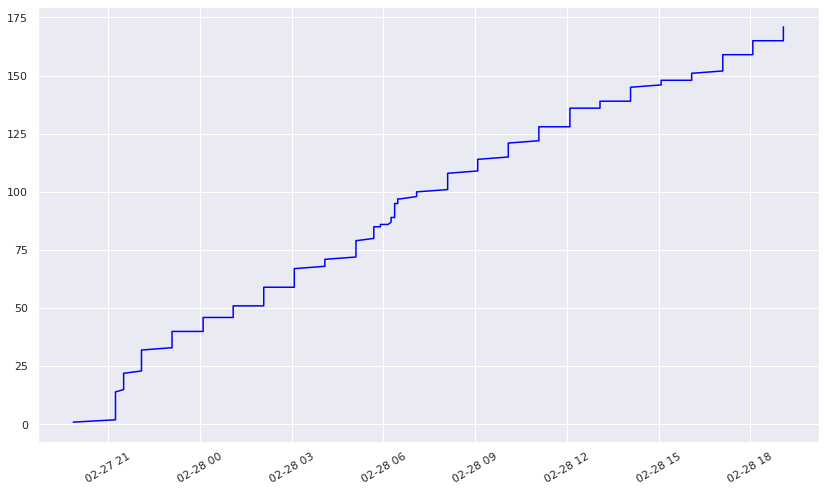

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
